# Multi Layer Perceptrons | Lecture 1

A perceptron (threshold unit) can learn anything that it can represent (i.e. anything separable with a hyperplane)

How could we use this?

# Hidden Units & Weight Updates | Lecture 2

## Learning with Hidden Units

* Networks without hidden units are very limited in the input-output mappings they can model
    * more layers of linear units do not help. Its still linear
    * fixed output non-linearities are not enough

* We need multiple layers of adaptive non-linear hidden units. This gives us a universal approximator. But how can we train such nets?
    * We need an efficient way of adapting all the weights not just the last layer. This is hard. Learning the weights going into hidden units is equivalent to learning features

## Learning by adjusting weights

* Randomly adjust one weight and see if it improves performance. If so, save the change
    * very inefficient. We need to do multiple froward passes. On a representative set of training data just to change one weight.
    * towards the end of learning, large weight adjustments will nearly always make things worse.

* We could randomly adjust all the weights in parallel and correlate the performanec gain with the weight changes
    * Not any better because we need lots of trials to "see" the effect of changing one weight through the noise created by all the others.

Learning the output to hidden weights is easy. Learning the input to hidden weights is hard.

## Learning Algorithms for MLP

* similar to the perceptron learning algorithm
    * one minor difference is that we may have several outputs, so we have an output vector h_w(x) rather than a single value, and each example has an output vector y.
    * the major difference is that, whereas the error y - h_w at the perceptron output layer is clear, the rror at the hidden layers seems mysterious because the training data does not way what value the hidden nodes should have

We can back-propagate the error from the output layer to the hidden layers. the back-propagation process emerges directly from a derivation of the overall error gradient.

uses derivation of gradiaent to update weights

## The idea behind backpropagation

* we don't know what the hidden units ought to do, but we can compute how fast the error changes as we change a hidden activity
    * instead of using desired activities to train the hidden units, use error derivatives w.r.t. hidden activities
    * each hidden activity can affect many output units and can therfore have many separate effects on the error. These effects must be combined
    * we can compute error derivatives for all the hidden units efficiently
    * once we have the error derivatives for the hidden activities, its easy to get the error derivatives for the weights going inot a hidden unit.

## Backpropagation

* gradient descent over entire network weight vector
* easily generalized to arbitrary directed graphs
* will find a local, not necessarily global error minimum - in practice often works well (can be invoked multiple times with different initial weights)
often include weight momentum term

$$\Delta w_{i, j}(n) = \eta \text{ } \delta \text{ } x_{i,j} + \alpha \text{ } \delta \text{ } w_{i,j}(n-1)$$

* minimizes error training examples
* training can be slow typical 1000 - 10000 iterations
* using network after training is fast

## Convergence of Backprop

Gradient descent to some local minimum perhaps not global minimum

* add momentum term: $\Delta W_{k,i}(n)$ - $\Delta w_{i, j}(n) = \eta \text{ } \delta \text{ } x_{i,j} + \alpha \text{ } \delta \text{ } w_{i,j}(n-1)$ with $\gamma \epsilon [0, 1]$

* stochastic gradient descent
* train multiple nets with different initial weights

Nature of convergence

* initialize weights newar zero
* therefore, initial networks near-linear
* increasingly non-linear functions possible as training progresses

## backpropagation algorithm

* initialize each $w_i$ to some small random value
* until the termination condistion is met, Do
    - for each training example $<(x_i ... x_n), t>$ do
        - input the instance $(x_1 ... x_n)$ to the network and compute the network outputs $y_k$
        - for each output unit k
            - $\delta = y_k(1-y_k)(t_k - y_k)$
        - for each higgen unit h
            - $\delta = y_h(1-y_h)\sum_k w_{h,k} \Gamma_k$
        - for each network weight $w_{i,j}$ Do
            - $w_{i,j} = w_{i,j} + \Delta w_{i,j}$ where $\Delta w_{i,j} = \eta \delta_j x_{i,j}$

# Heuristics & Expressivity | Lecture 3

taking a look at how we can speed up convergence or multi layer perceptron

## Heuristics to speed convergence

* to speed the convergence of the back-propagation algorithm the following heuristics are applied:
    * H1: use sequential (online) vs bactch update
    * H2: maximize information content
        * use examples that produce largest error
        * use example which very different from all the previous ones
    * H3: use an antisymmetric activation function, such as the hyperbolic tangent. Antisymmetric means: $\phi (-x) = - \phi (x)$
    * H4: use different target values inside a smaller range, different from asymptotic values of the sigmoid

* H5: normaize the inputs: 
    * create zero-mean variables
    * decorrelate the variables
    * scale the variables to have covariances approximately equal
* H6: initialize properly the weights. Use a zero mean distribution with variance of: $\sigma_w = \frac{1}{\sqrt{m}}$
    * where m is the number of connections arriving to a neuron

## Adjsting Learning Rates

* R1: every adjustable parameter should have it's own learning rate
* R2: every learning rate should be allowed to adjust from one iteration to the next
* R3: when the derivative of the cost fucntion wrt a weight has the same algebraic sign for several consecutive iteration so fthe algortihm, the learing rate for that particular weight should be increased
* R4: when the algebraic sign of the derivative above alternates for several consecutive iterations of the algorithm the learning rate should be decreased

## General Comments

* empirical knowledges shows that the number of data pairs that are needed in order to achieve a givene error level $\epsilon$ is:

$$ N = o(\frac{W}{\epsilon})$$

* where W is the total number of adjustable parameters of the model. There is mathematical support for this observation (but we will not analyse this further)
* there is the curse of dimensionality for approximating functions in high-dimensional spaces
* it is theoretically justified to use two hidden layers

## Expressiveness of multi-layer feedforward networks

Boolean functions:
* every boolean function can be represented by a network with single hidden layer
* but might require exponential (in number of inputs) hidden units

Continuous functions:
* every bounded continuous function can be apporoximated with arbitrarily small error, by network with single hidden layer

Any function can be approximated to arbitrary accuracy by a netowrk with two hidden layers

## How long should you train the net?

* the goal is to achieve a balance between correct responses for the training patterns and correct responses for new patterns. (that is, a balance between memorization and generalization)

* if you train the net for too long, then you run the risk of overfitting

* select number of training iterations via cross-validation on holdout set

# Dataflow programming & TensorFlow | Lecture 4

## Core TensorFlow Constructs

* dataflow graphs: entire computation
* data noes: individual data or operations
* edges: implicit dependencies between nodes
* operations: any computation
* constants: single values (tensors)

all noes return tensors, or high-dimension matrices

how a node computes is indistingushable to TensorFlow

you are metaprogramming. no computation occurs yet

In [1]:
!pip3 install TensorFlow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 9.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 56.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 63.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 KB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 60.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 8.5 M

In [3]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# data flow example$
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0, dtype=tf.float32)
node3 = tf.add(node1, node2)

# running code
tf.Session().run(node3)

In [ ]:
# or

# data flow example$
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0, dtype=tf.float32)
node3 = tf.add(node1, {node1 : 3, node2 : 4})


In [ ]:
# mutable state variables
W = tf.Variable([0.3], dtype=tf.float32)
b = tf.Variable([0.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)

# implementing our neural network
linear_model = W * x + b #operator overloading
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run(linear_model)

In [ ]:
# specify where code runs and allows us to build a visual of our neural netowork
with tf.device("/task:0/cpu:0"):
    W = tf.Variable(...)
    V = tf.Variable(...)

with tf.device("/task:1/gpu:0"):
    output = tf.some_fancy_math(input, W) + b

In [11]:
# linear regression sample code

import numpy as np
import sys
import tensorflow.compat.v1 as tf
import numpy as np
print(tf.__version__)
tf.disable_eager_execution()
from sklearn.datasets import fetch_california_housing
import ssl; ssl._create_default_https_context = ssl._create_stdlib_context

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

2.16.1


In [12]:
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name='y')
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

In [13]:
with tf.Session() as sess:
    theta_value = theta.eval()

2024-03-24 03:38:06.170450: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


In [14]:
theta_value

array([[-3.7086937e+01],
       [ 4.3637305e-01],
       [ 9.4115436e-03],
       [-1.0702482e-01],
       [ 6.4428186e-01],
       [-4.0383993e-06],
       [-3.7829489e-03],
       [-4.2279035e-01],
       [-4.3615198e-01]], dtype=float32)

# Using TensforFlow | Lecture 5

## MNIST Dataset

In [1]:
import numpy as np
import sys
import tensorflow.compat.v1 as tf
import numpy as np
print(tf.__version__)
tf.disable_eager_execution()
tf.reset_default_graph()

#
n_inputs = 28*28 # MNIST, 28x28 input

# setting up two hidden layers
n_hidden1 = 300
n_hidden2 = 100

# ten outputs for output layer
n_outputs = 10


2.16.1


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [6]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name = "y")

In [7]:
# creating the tf neuron layer
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [8]:
# creating our hidden layers
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1',
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2',
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [9]:
# creating out loss function
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [10]:
# settign up our learning rate
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [11]:
# capture our accuracy
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [12]:
# initialize variable and saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [13]:
# setting up number of runs and batch size
n_epochs = 40
batch_size = 50

In [14]:
# tensor flow shuffle data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [17]:
# run the neural net
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, 'Batch Accuracy:', acc_batch, 'Val accuracy:', acc_val)
    save_path = saver.save(sess, "my_model_final.ckpt")

0 Batch Accuracy: 0.84 Val accuracy: 0.9194
1 Batch Accuracy: 0.86 Val accuracy: 0.9334
2 Batch Accuracy: 0.98 Val accuracy: 0.9446
3 Batch Accuracy: 0.94 Val accuracy: 0.9518
4 Batch Accuracy: 0.92 Val accuracy: 0.9548
5 Batch Accuracy: 0.94 Val accuracy: 0.9588
6 Batch Accuracy: 0.96 Val accuracy: 0.9606
7 Batch Accuracy: 0.96 Val accuracy: 0.9612
8 Batch Accuracy: 0.96 Val accuracy: 0.9658
9 Batch Accuracy: 1.0 Val accuracy: 0.9664
10 Batch Accuracy: 0.98 Val accuracy: 0.9664
11 Batch Accuracy: 0.98 Val accuracy: 0.9678
12 Batch Accuracy: 0.94 Val accuracy: 0.9698
13 Batch Accuracy: 0.98 Val accuracy: 0.9692
14 Batch Accuracy: 0.96 Val accuracy: 0.9722
15 Batch Accuracy: 1.0 Val accuracy: 0.9718
16 Batch Accuracy: 0.98 Val accuracy: 0.9732
17 Batch Accuracy: 0.98 Val accuracy: 0.9726
18 Batch Accuracy: 1.0 Val accuracy: 0.9736
19 Batch Accuracy: 1.0 Val accuracy: 0.9738
20 Batch Accuracy: 0.98 Val accuracy: 0.9752
21 Batch Accuracy: 1.0 Val accuracy: 0.975
22 Batch Accuracy: 1.0 Val

In [28]:
# calling back the saved neural network
with tf.Session() as sess:
    saver.restore(sess, 'my_model_final.ckpt')
    # X_new_scaled = [...]
    # Z=logits.eval(feed_dict[X: X_new_scaled])
    # Y_pred=np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


# Using Keras | Lecture 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [2]:
# load out data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
# reshape data, flatten out to a 784 vector
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors
X_test = X_test.reshape(10000, 784) # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors

X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255 # normalize each value for each pizel for the entire vector for each input
X_test /=255

print('training matrix shape', X_train.shape)
print('testing matrix shape', X_test.shape)

training matrix shape (60000, 784)
testing matrix shape (10000, 784)


In [4]:
# review and set up y values
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [5]:
# set up our model (sequential model)
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# compile our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# fit our model data
model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=5,
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8656 - loss: 0.4504
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.1046
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9790 - loss: 0.0688
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9825 - loss: 0.0552
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0410


In [9]:
# get model score
score = model.evaluate(X_test, Y_test)
print('test score:', score[0])
print('test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.0850
test score: 0.06902448832988739
test accuracy: 0.9801999926567078


In [25]:
# checking results
predicted_probs = model.predict(X_test)
predicted_classes = predicted_classes = np.argmax(predicted_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step


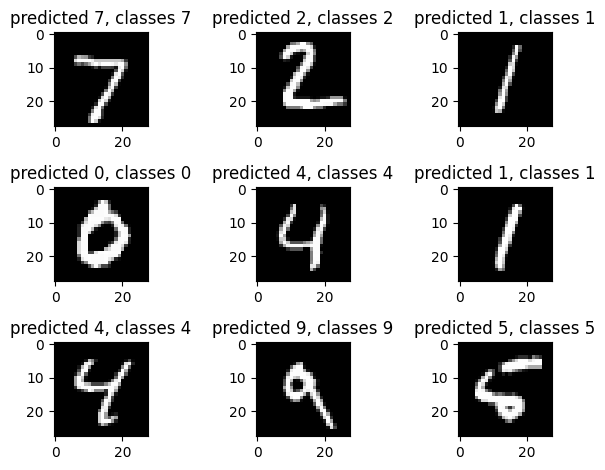

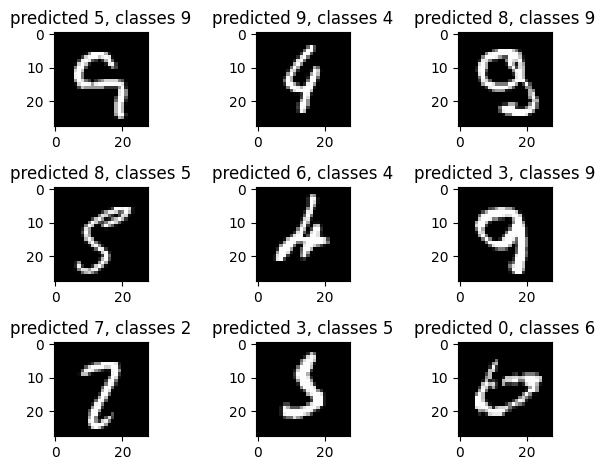

In [26]:
# plot results
%matplotlib inline
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('predicted {}, classes {}'.format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()
plt.show()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3,i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('predicted {}, classes {}'.format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()
plt.show()